In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
 
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/Man1ish/datarepo/master/finaldata_filter.csv")
columns_of_interest = ['total_memory', 'free_memory', 'available_memory', 'cache_memory',
       'swap_total_memory', 'app_total_memory', 'app_free_memory',
       'app_used_memory', 'no_of_processor', 'max_cpu_frequency', 'cputime','energy','time']
data_interest = data[columns_of_interest]
data_interest.describe()
data_interest.dropna(inplace=True)
data_interest['time'] = data_interest['time'] * 0.001
x = data_interest.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.037671,0.056911,0.060762,0.551868,0.092257,0.183784,0.063637,0.0,0.410788,0.001916,0.016142,0.008332
1,0.0,0.031097,0.052770,0.058365,0.551868,0.093296,0.184954,0.064591,0.0,0.411014,0.006060,0.013745,0.007271
2,0.0,0.023727,0.048485,0.056005,0.551868,0.093547,0.197595,0.061573,0.0,0.411014,0.009960,0.013994,0.007173
3,0.0,0.040865,0.051416,0.053675,0.551868,0.095138,0.195782,0.063981,0.0,0.411014,0.013837,0.013654,0.007223
4,0.0,0.048426,0.053687,0.053792,0.551868,0.094865,0.192570,0.064493,0.0,0.411014,0.017774,0.014361,0.007489


In [2]:
#### data_interest.fillna(data_interest.mean(), inplace=True)
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
clustering_kmeans.fit(df) 

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=2, n_jobs=-1, precompute_distances='auto')

In [3]:
column = data["energy"]
max_index = column.idxmax()
max_index

2605

/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

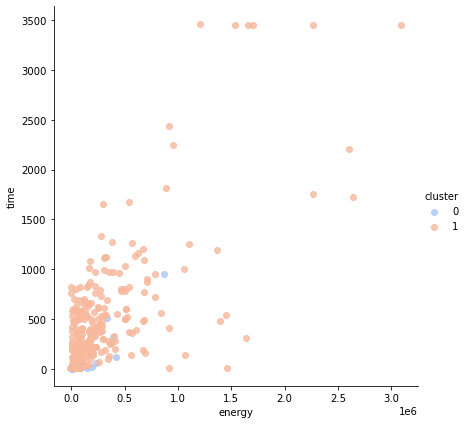

In [4]:
import seaborn as sns
data_interest["cluster"] = clustering_kmeans.labels_
data_interest["process"] = data["process"]
data_interest["energy"] = data["energy"]

sns.lmplot('energy','time',data=data_interest,hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [5]:
labels = clustering_kmeans.labels_
labels.size
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [6]:
#Cluster 
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 1394, 1: 5609}

In [12]:
data['label'] = labels

In [13]:
label = 2
label0 = data[data['label'] == 0]
label0.to_csv('filter/cluster2/cat0.csv')

label1 = data[data['label'] == 1]
label1.to_csv('filter/cluster2/cat1.csv')